In [4]:
from IPython.display import display, Image, HTML
global blankline
blankline='\n**************************************************************************************************************************\n'
print (blankline)


**************************************************************************************************************************



In [5]:
# how about an iceberg as introduction? pretty scary... 
image_url = "https://www.fundacionaquae.org/wp-content/uploads/2022/01/que-es-un-iceberg-e1643453600667.jpg"

# we define the desired width and height
width = 700
height = 650
image_html = f'<div style="display: flex; justify-content: center;"><img src="{image_url}" width="{width}" height="{height}"></div>'

# and display the image HTML code
display(HTML(image_html))

print("                                                                                                   'Photo by FundacionAquae'")

                                                                                                   'Photo by FundacionAquae'


<h1 align="center"> EDA: The Titanic Dataset </h1> 


Isn't it fascinating how the _Titanic will just never die?_ However, most of its passengers suffered a different luck... We are ready to gather some insights on that topic and predict the survival outcome through a logistic regression model. An Exploratory Data Analysis does two main things:
1. It helps clean up a dataset.
2. It gives you a better understanding of the variables and the relationships between them.

This EDA is on purpose, a tad informal and a little experimental! Let's begin, shall we?

In [6]:
# we start by importing all the libraries needed (this can be updated any time, as we need!)
%pip install scikit-learn
import sys
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
print (blankline)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.

**************************************************************************************************************************



print (blankline)

### 1 - MAIN BUSINESS QUESTION

This is our objective, our goal. We work towards finding out answers to this question. The better the data, the more accurate the outcome will be.

The business question we are looking to answer is:

**What are the factors directly related to Titanic survival vs not survival?**

**What variables influenced the survival chances directly?**

In [7]:
print (blankline)


**************************************************************************************************************************



### 2 - UNDERSTANDING OUR DATASET

Our mission here is to fully understand our dataset. "How can we know if we don't know?" We will look at whether it is needed to remove redundant variables, such as columns that have too many null values, as an example. Also, removing outliers and rows with possible null values. 

In [8]:
# loading the data set into the notebook
db=pd.read_csv("titanic.csv") 

# Create a copy of the dataset
clean_db = db.copy()

# understanding how many columns and rows it contains
clean_db.shape

(891, 12)

In [9]:
# quickly visualising our dataset
clean_db.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# we continue by using the dataframe.info() function to help us further understand the data and type
clean_db.info()
print (blankline)
# the .info method will give us some extra information on the data and a different visualisation
clean_db.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

**************************************************************************************************************************



<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [11]:
# we now see the names of columns, this is always very interesting as we figure out the variables involved!
clean_db.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# for clarity purposes, we rename the following columns
clean_db.rename(columns={"PassengerId": "PassID", "Pclass": "PassClass", "SibSp": "SiblingsSpouse", "Parch": "ParentsChildren"}, inplace=True)
clean_db.columns

Index(['PassID', 'Survived', 'PassClass', 'Name', 'Sex', 'Age',
       'SiblingsSpouse', 'ParentsChildren', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [13]:
# the function dataframe.nunique() is also very useful as it shows us the number of unique values each column has.
clean_db.nunique()

PassID             891
Survived             2
PassClass            3
Name               891
Sex                  2
Age                 88
SiblingsSpouse       7
ParentsChildren      7
Ticket             681
Fare               248
Cabin              147
Embarked             3
dtype: int64

**We can conclude that we have 891 entries (rows) and 12 variables (columns). Each row corresponding to the information of each passenger that boarded the Titanic.**

The code above provides also great insight when it comes to categorical + non-categorical values. We can now see that some variables have a couple of unique values (Sex, Survived, PassClass, Embarked) while others have many unique values! 

In [14]:
# let's discover and display the unique values in Passenger Class
unique_values = clean_db['PassClass'].unique()
print("PassClass unique values are: " + str(unique_values))

PassClass unique values are: [3 1 2]


In [15]:
# let's discover and display the unique values in SiblingsSpouse
unique_values = clean_db['SiblingsSpouse'].unique()
print("SiblingsSpouse unique values are: " + str(unique_values))

SiblingsSpouse unique values are: [1 0 3 4 2 5 8]


In [16]:
# let's discover and display the unique values in ParentsChildren
unique_values = clean_db['ParentsChildren'].unique()
print("Parents/Children unique values are: " + str(unique_values))

Parents/Children unique values are: [0 1 2 5 3 4 6]


In [17]:
# let's discover and display the unique values in Ticket
unique_values = clean_db['Ticket'].unique()
print("Ticket unique values are: " + str(unique_values))

Ticket unique values are: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '3

In [18]:
# now let's see how many repetitions there are of each unique ticket value
ticket_count = clean_db['Ticket'].value_counts()
print("Ticket value counts are:\n", ticket_count)

Ticket value counts are:
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


In [19]:
# let's discover and display the unique values in Fare
# we see there are float and integer values
fare_unique_values = clean_db['Fare'].unique()
print("Fare unique values are: " + str(fare_unique_values))

Fare unique values are: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.40

In [20]:
# let's discover and display the unique values in Fare
fare_value_counts = clean_db['Fare'].value_counts()
print("Fare value counts are: " + str(fare_value_counts))

Fare value counts are: 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [21]:
# let's discover and display the unique values in Cabin
unique_values = clean_db['Cabin'].unique()
print("Cabin unique values are: " + str(unique_values))

Cabin unique values are: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [22]:
# let's get the count of each unique value in 'Cabin'
value_counts = clean_db['Cabin'].value_counts().reset_index()

# , we rename the columns
value_counts.columns = ['Cabin', 'Count']

# and display the result
print(value_counts)

           Cabin  Count
0        B96 B98      4
1             G6      4
2    C23 C25 C27      4
3        C22 C26      3
4            F33      3
..           ...    ...
142          E34      1
143           C7      1
144          C54      1
145          E36      1
146         C148      1

[147 rows x 2 columns]


In [23]:
# time to discover and display the unique values in Embarked
unique_values = clean_db['Embarked'].unique()
print("Embarked unique values are: " + str(unique_values))

Embarked unique values are: ['S' 'C' 'Q' nan]


In [24]:
# the information we get now, is different from the information we will get after the clean up process
clean_db.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassID,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
PassClass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SiblingsSpouse,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
ParentsChildren,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [25]:
print (blankline)


**************************************************************************************************************************



### 3 - DATA CLEANING AND PREPARATION

In this section of the process, we will be preparing raw data so that it is suitable for further processing and analysis. The main steps here are cleaning, and labeling raw data into a form suitable for machine learning (ML) algorithms.

In [26]:
# let's set our index, which will be PassengerId
clean_db.set_index("PassID", inplace=True)

In [27]:
# we also need to know where and how many missing values are in our dataset
clean_db.isnull().sum()

Survived             0
PassClass            0
Name                 0
Sex                  0
Age                177
SiblingsSpouse       0
ParentsChildren      0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

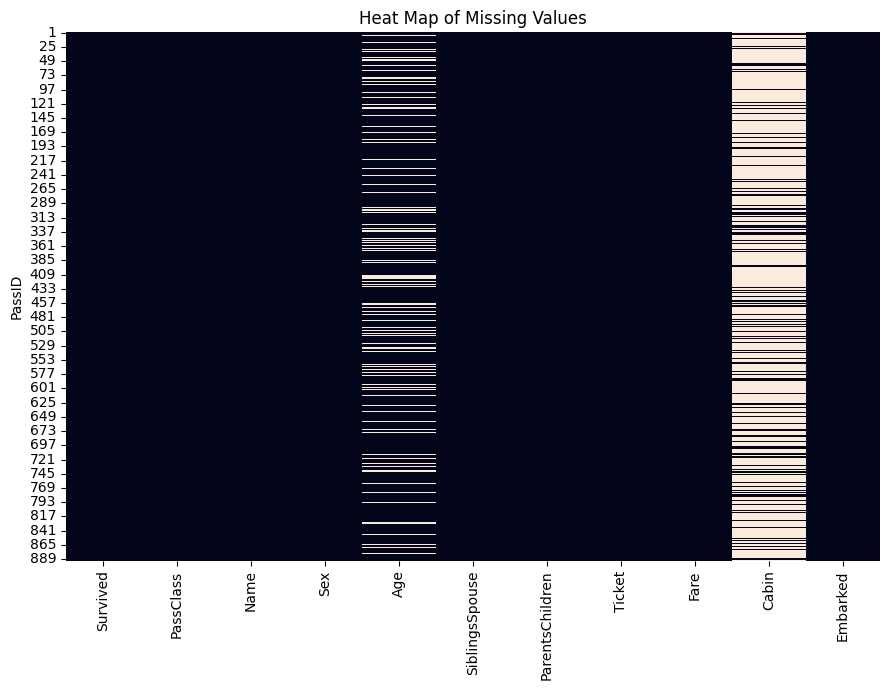

In [28]:
# it's a nice idea to visualise the missing data, using a heatmap
# set the figure size to:
plt.figure(figsize=(9, 7)) 
sns.heatmap(clean_db.isnull(), cbar=False).set_title("Heat Map of Missing Values")
plt.tight_layout()

# Display the plot
plt.show()

In our dataset, columns Embarked, Age and Cabin have 2, 177 and 687 empty cells respectively (out of 891).
We need to think and choose an approach to this situation!

    Embarked column: we decide it is a good approach to fill up the NaN with the mode value.
    
    Age column: we first think of filling up with the mean age, but that would make the dataset unrealistic and its quality, pretty low, affecting our business question directly! We realise we can extract data from the names and the sex columns, in order to obtain a median we can use to fill in those data gaps!
    
    Cabin column: it is missing so many values... let's just apply a mode to fill NaN in and adress the name issue.

In [103]:
# we define the mapping of boarding town codes to full names
embarked_mapping = {
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
}

# let's map the 'Embarked' column using the defined mapping
clean_db['Embarked'] = clean_db['Embarked'].map(embarked_mapping)

# we fill the missing values in the 'Embarked' column with the mode value
clean_db['Embarked'].fillna(clean_db['Embarked'].mode()[0], inplace=True)

# and we display the unique values in the 'Embarked' column
unique_values = clean_db['Embarked'].unique()
print("Embarked unique values now are: " + str(unique_values))


KeyError: 0

In [30]:
clean_db.isnull().sum()

Survived             0
PassClass            0
Name                 0
Sex                  0
Age                177
SiblingsSpouse       0
ParentsChildren      0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
dtype: int64

In [31]:
# time to deal with the Age column, challenging enough...
# we begin by creating a new column named 'Title' into which we extract the title passengers were addressed with.
clean_db['Title'] = clean_db.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
# let's check!
clean_db.head(5)

,Survived,PassClass,Name,Sex,Age,SiblingsSpouse,ParentsChildren,Ticket,Fare,Cabin,Embarked,Title
PassID,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr


In [32]:
# how many salutation titles did we obtain from the dataset?
title_unique_values = clean_db['Title'].unique()
print("Title unique values are: " + str(title_unique_values))

Title unique values are: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [104]:
# that's quite nice and let's make it better for clarity purposes:
title_replacements = {
    'Rev': 'Reverend',
    'Mme': 'Madame',
    'Mlle': 'Mademoiselle',
    'Ms': 'Miss',
    'Dr': 'Doctor',
    'Col': 'Colonel',
    'Capt': 'Captain',
}

# we do this to replace the values in the 'Title' column
clean_db['Title'] = clean_db['Title'].replace(title_replacements)

# let's obtain the updated unique values
title_unique_values = clean_db['Title'].unique()

# we convert unique values to a DataFrame
title_unique_df = pd.DataFrame({'Title': title_unique_values})

# and print the DataFrame
print(title_unique_df)

           Title
0             Mr
1            Mrs
2           Miss
3         Master
4            Don
5       Reverend
6         Doctor
7         Madame
8          Major
9           Lady
10           Sir
11  Mademoiselle
12       Colonel
13       Captain
14  the Countess
15      Jonkheer


In [34]:
# our approach is to use the title and each passenger's class information to find the mean age of each column and assign it to 'Age' later.
clean_db.groupby(['Title', 'PassClass'])['Age'].agg(['mean', 'count'])

mean  count
Title        PassClass                  
Captain      1          70.000000      1
Colonel      1          58.000000      2
Doctor       1          43.750000      4
             2          38.500000      2
Don          1          40.000000      1
Jonkheer     1          38.000000      1
Lady         1          48.000000      1
Madame       1          24.000000      1
Mademoiselle 1          24.000000      2
Major        1          48.500000      2
Master       1           5.306667      3
             2           2.258889      9
             3           5.350833     24
Miss         1          30.000000     45
             2          22.560606     33
             3          16.123188     69
Mr           1          41.580460     87
             2          32.768293     82
             3          28.724891    229
Mrs          1          40.882353     34
             2          33.682927     41
             3          33.515152     33
Reverend     2          43.166667      6
Sir          1          49.000000      1
the Countess 1          33.000000      1

In [35]:
# first we turn the function into a variable and give it a name.
mean_age = clean_db.groupby(['Title', 'PassClass'])['Age'].mean()

# then we iterate over our dataframe rows.
for index, row in clean_db.iterrows():
    # if 'Age' is missing, proceed as follows.
    if pd.isnull(row['Age']):
        title = row['Title']
        pass_class = row['PassClass']
        
        # then instruct to check if there is a corresponding mean age value
        if (title, pass_class) in mean_age.index:
            # and fill in the missing 'Age' with the mean age value!
            clean_db.loc[index, 'Age'] = mean_age.loc[(title, pass_class)]
# we check this!
clean_db.isnull().sum()

Survived             0
PassClass            0
Name                 0
Sex                  0
Age                  0
SiblingsSpouse       0
ParentsChildren      0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Title                0
dtype: int64

At this point we realise that we can gather more insight by merging the ParentsChildren and SiblingsSpouse columns into a new one. We don't have a way of finding out especificaly how many of each are assigned to each passenger, so let's create a merged column of both called FamilyMembers.

In [36]:
# let's discover and display the unique values in Cabin
unique_values = clean_db['Cabin'].unique()
print("Cabin unique values are: " + str(unique_values))

Cabin unique values are: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [105]:
# now, let's make some changes after the insight we gained from our step 2 section, UNDERSTANDING OUR DATA.
clean_db['FamilyMembers'] = clean_db.ParentsChildren + clean_db.SiblingsSpouse
clean_db.head(2)

AttributeError: 'DataFrame' object has no attribute 'ParentsChildren'

In [38]:
# now we are curious about those passengers that had no family members aboard with them:
# we create a new column called 'NoFamily' for those who embarked alone
clean_db['NoFamily'] = clean_db.FamilyMembers == 0
clean_db.head(2)

,Survived,PassClass,Name,Sex,Age,SiblingsSpouse,ParentsChildren,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily
PassID,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr,1,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs,1,False


In [39]:
# and really, now we are just going to drop the SiblingsSpouse, ParentsChildren columns
columns_to_drop = ['SiblingsSpouse', 'ParentsChildren'] 
clean_db = clean_db.drop(columns=columns_to_drop)

In [40]:
# again, let's view this change
clean_db.head(2)

,Survived,PassClass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily
PassID,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,Southampton,Mr,1,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,Cherbourg,Mrs,1,False


In [41]:
# as per Fare, we highly suspect it might be related to survival. 
# in the process, we realise there are some floats and some integers in the values, which we need to adress as follows:
# we first convert all values to float type
clean_db['Fare'] = clean_db['Fare'].astype(float)
# we'd like a quick view as a list to verify that conversion worked
values_list = clean_db['Fare'].tolist()
print(values_list)

[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31.275, 7.8542, 16.0, 29.125, 13.0, 18.0, 7.225, 26.0, 13.0, 8.0292, 35.5, 21.075, 31.3875, 7.225, 263.0, 7.8792, 7.8958, 27.7208, 146.5208, 7.75, 10.5, 82.1708, 52.0, 7.2292, 8.05, 18.0, 11.2417, 9.475, 21.0, 7.8958, 41.5792, 7.8792, 8.05, 15.5, 7.75, 21.6792, 17.8, 39.6875, 7.8, 76.7292, 26.0, 61.9792, 35.5, 10.5, 7.2292, 27.75, 46.9, 7.2292, 80.0, 83.475, 27.9, 27.7208, 15.2458, 10.5, 8.1583, 7.925, 8.6625, 10.5, 46.9, 73.5, 14.4542, 56.4958, 7.65, 7.8958, 8.05, 29.0, 12.475, 9.0, 9.5, 7.7875, 47.1, 10.5, 15.85, 34.375, 8.05, 263.0, 8.05, 8.05, 7.8542, 61.175, 20.575, 7.25, 8.05, 34.6542, 63.3583, 23.0, 26.0, 7.8958, 7.8958, 77.2875, 8.6542, 7.925, 7.8958, 7.65, 7.775, 7.8958, 24.15, 52.0, 14.4542, 8.05, 9.825, 14.4583, 7.925, 7.75, 21.0, 247.5208, 31.275, 73.5, 8.05, 30.0708, 13.0, 77.2875, 11.2417, 7.75, 7.1417, 22.3583, 6.975, 7.8958, 7.05, 14.5, 26.0, 13.0, 15.0458, 26.2833, 53.1, 9.

In [42]:
# in order to better visualise the 'Fare' information, we will split it into 3 categories
clean_db['FareCategory'] = pd.qcut(clean_db['Fare'], q=3, labels=['Low', 'Medium', 'High'])
# we are in a learning process here, so let's view what we just did!
clean_db.head(5)

,Survived,PassClass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily,FareCategory
PassID,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,Southampton,Mr,1,False,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,Cherbourg,Mrs,1,False,High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss,0,True,Low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,Southampton,Mrs,1,False,High
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,Southampton,Mr,0,True,Low


In [43]:
# something else we'd like to do, is round up the Fare column, as follows:
clean_db['Fare'] = np.ceil(clean_db['Fare'])
# and we view these changes, sorted:
fare_unique_values = sorted(clean_db['Fare'].unique(), reverse=True)
print("Fare unique values (higher to lower) are:\n" + str(fare_unique_values))

Fare unique values (higher to lower) are:
[513.0, 263.0, 248.0, 228.0, 222.0, 212.0, 165.0, 154.0, 152.0, 147.0, 136.0, 135.0, 134.0, 120.0, 114.0, 111.0, 109.0, 107.0, 94.0, 92.0, 90.0, 87.0, 84.0, 83.0, 82.0, 80.0, 79.0, 78.0, 77.0, 76.0, 74.0, 72.0, 71.0, 70.0, 67.0, 65.0, 64.0, 62.0, 60.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 48.0, 47.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 5.0, 0.0]


In [44]:
print (blankline)


**************************************************************************************************************************



### 4. DATA STATISTICS AND VISUALISATION

In this section, we want to look at the statistics of this dataset and visualising its contents. Let's get into exploring and visualising the data!

**Univariate Analysis**: we examine each variable separately. It aims to summarise and describe the distribution, central tendency, and dispersion of a variable. 
Common techniques include _histograms, box plots, summary statistics (mean, median, mode), and measures of dispersion (variance, standard deviation)._

**Bivariate Analysis**: we examine the relationship between two variables, such as age and survival scores, in this dataset. It aims to understand how one variable (independent variable) is related to another variable (dependent variable). It helps identify patterns, associations, correlations, or dependencies between variables. Common techniques include scatter plots, correlation analysis, contingency tables, and t-tests.

**Multivariate Analysis**: we examine the relationship between many variables, such as those in the dataset entirely, as long as data quality has been ensured. Some common methods are multiple linear regression, multiple logistic regression, MANOVA, factor analysis, and cluster analysis—to name just a few...!

Looks like we are ready to dive into (no pun intended) the data on survived vs not survived.

## Univariate Analysis

In [45]:
# this very simple line of code returns survived (1) vs not survived (0)
survived_counts = clean_db['Survived'].value_counts()
print(survived_counts)

0    549
1    342
Name: Survived, dtype: int64


In [46]:
# how many of them are female and how many are male? 
survived_gender_counts = clean_db.groupby(['Survived', 'Sex']).size().unstack()

# establish the count of male survivors
male_survivors = survived_gender_counts.loc[1, 'male']
# establish the count of female survivors
female_survivors = survived_gender_counts.loc[1, 'female']
# establish the count of male non-survivors
male_non_survivors = survived_gender_counts.loc[0, 'male']
# establish the count of female non-survivors
female_non_survivors = survived_gender_counts.loc[0, 'female']

# it seems a good idea to visualise this as a small datafame
gender_counts = pd.DataFrame({
    'Survivors': [female_survivors, male_survivors],
    'Non-Survivors': [female_non_survivors, male_non_survivors]
}, index=['Female', 'Male'])
# and display!
print(gender_counts)

        Survivors  Non-Survivors
Female        233             81
Male          109            468


In [47]:
# we want to visualise our variables in order to put them in the code!
clean_db.head(2)

,Survived,PassClass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily,FareCategory
PassID,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,8.0,NaN,Southampton,Mr,1,False,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,72.0,C85,Cherbourg,Mrs,1,False,High


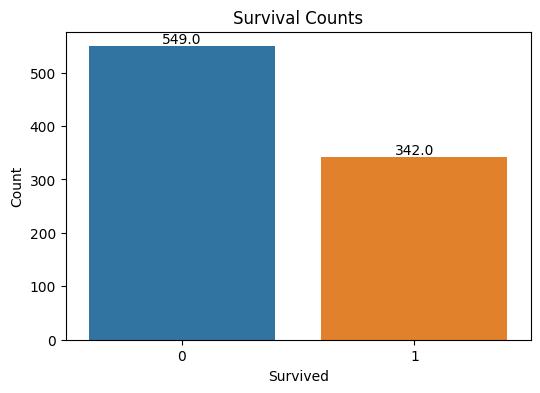

In [48]:
# this is the univariate analysis for the 'Survived' variable
survived_counts = clean_db['Survived'].value_counts()
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=clean_db, x='Survived')
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')

# we add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

WE CAN SEE **MOST PEOPLE (MORE THAN HALF THAT BOARDED), DID NOT SURVIVE**

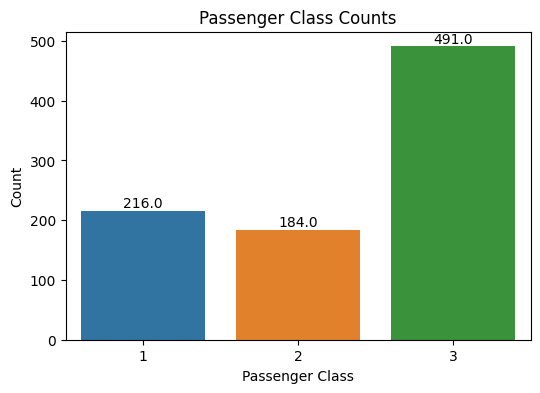

In [49]:
# this is the univariate analysis for the 'PassClass' variable
pclass_counts = clean_db['PassClass'].value_counts()
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=clean_db, x='PassClass')
plt.title('Passenger Class Counts')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# we add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

WE CAN SEE **MOST PEOPLE (MORE THAN HALF THAT BOARDED), WERE CLASS 3**

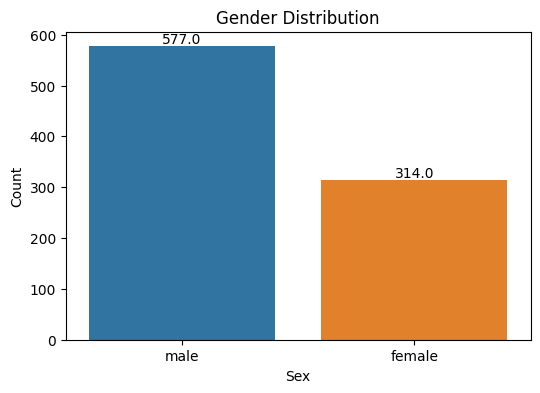

In [50]:
# this is the univariate analysis for the 'Sex' variable
sex_counts = clean_db['Sex'].value_counts()
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=clean_db, x='Sex')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

# we add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

WE CAN SEE **MOST PEOPLE (MORE THAN HALF THAT BOARDED), WERE MEN**

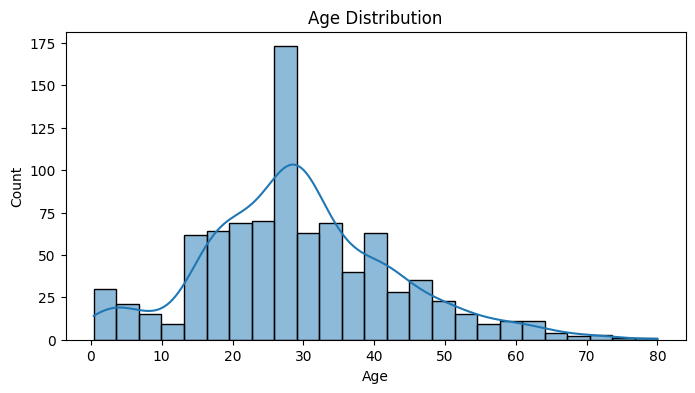

In [51]:
# this is the univariate analysis for the 'Age' variable
plt.figure(figsize=(8, 4))
sns.histplot(data=clean_db, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

WE CAN OBSERVE THE AGE DISTRIBUTION AND CONCLUDE THAT **MOST PASSENGERS WERE BETWEEN THE AGES OF 15 AND 40, ESPECIFICALLY A HIGH INCIDENCE OF AGES 26-30**

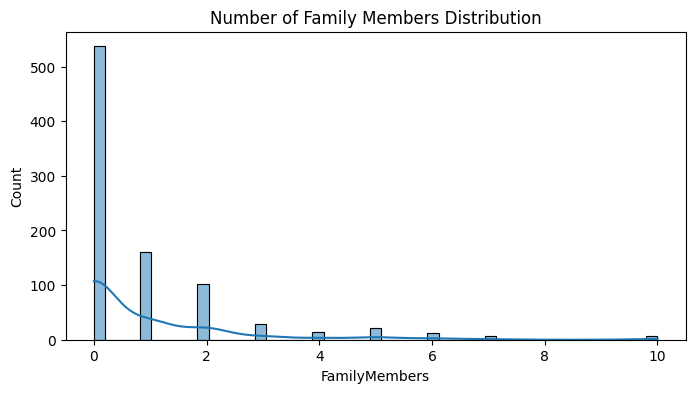

In [52]:
# this is the univariate analysis for the 'FamilyMembers' variable
plt.figure(figsize=(8, 4))
sns.histplot(data=clean_db, x='FamilyMembers', kde=True)
plt.title('Number of Family Members Distribution')
plt.xlabel('FamilyMembers')
plt.ylabel('Count')
plt.show()

WE CAN SEE THAT PASSENGERS THAT BOARDED WITH RELATIVES, **WERE FAMILIES OF 2 TO 4 MOSTLY**

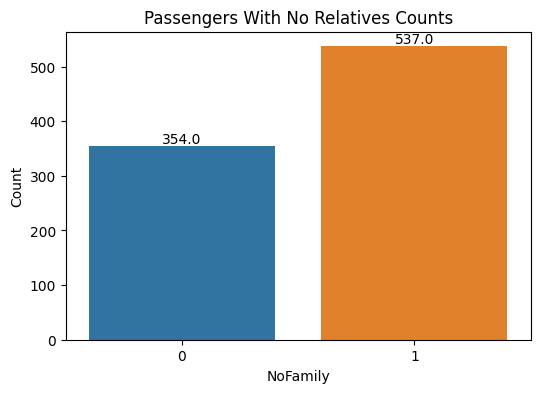

In [106]:
# this is the univariate analysis for the 'NoFamily' variable
no_family_counts = clean_db['NoFamily'].value_counts()
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=clean_db, x='NoFamily')
plt.title('Passengers With No Relatives Counts')
plt.xlabel('NoFamily')
plt.ylabel('Count')

# we add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

WE CAN SEE MOST PEOPLE (MORE THAN HALF THAT BOARDED), BOARDED ALONGSIDE AT LEAST A FAMILY MEMBER. **354 PEOPLE BOARDED WITH NO RELATIVES.**

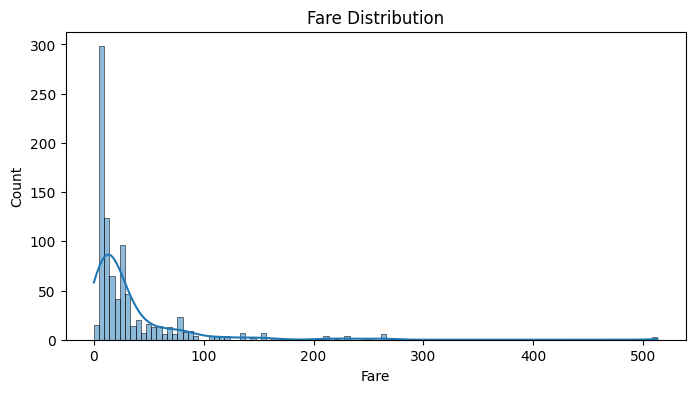

In [54]:
# this is the univariate analysis for the 'Fare' variable
plt.figure(figsize=(8, 4))
sns.histplot(data=clean_db, x='Fare', kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

WE CAN SEE THE **MOST PAID FARES WERE THE LOWEST FARES**

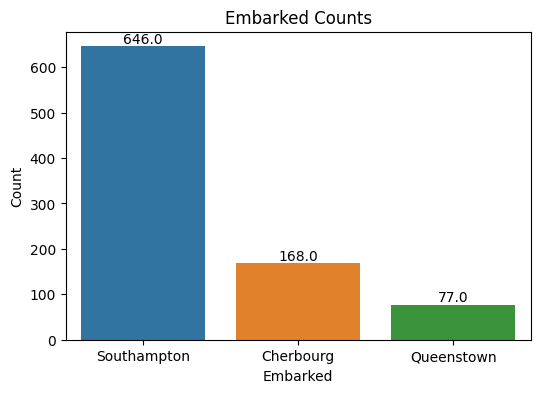

In [55]:
# this is the univariate analysis for the 'Embarked' variable
embarked_counts = clean_db['Embarked'].value_counts()
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=clean_db, x='Embarked')
plt.title('Embarked Counts')
plt.xlabel('Embarked')
plt.ylabel('Count')

# we add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

WE CAN SEE **MOST PEOPLE BOARDED AT SOUTHAMPTON**

## Bivariate analysis

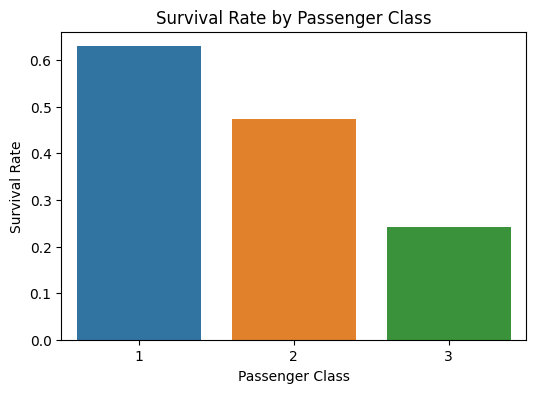

In [56]:
# we start with 'Passenger Class' and calculate the mean survival rate
survival_rate_by_class = clean_db.groupby('PassClass')['Survived'].mean()

# here we create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')

# and display it
plt.show()

**MOST PASSENGERS THAT SURVIVED WERE IN CLASS 1.** This is not surprising.

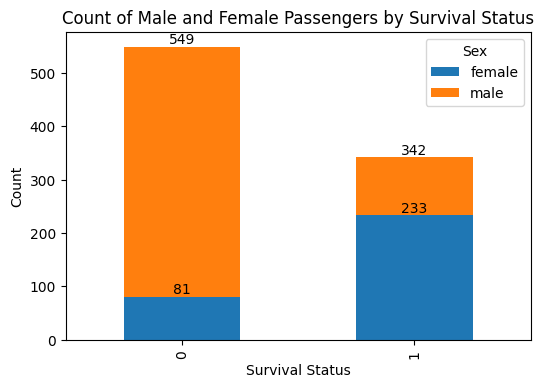

In [57]:
# let's continue, now we group the data by 'Survived' and 'Sex' and calculate the count,
survived_gender_counts = clean_db.groupby(['Survived', 'Sex']).size().unstack()

# set the bar plot,
ax = survived_gender_counts.plot(kind='bar', stacked=True, figsize=(6, 4))

# add count labels to the bars,
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# set the labels and title,
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Count of Male and Female Passengers by Survival Status')

# and show the plot!
plt.show()

WE CAN SEE THAT **MOST MEN DIED, AND MOST WOMEN SURVIVED**. SEX WAS DEFINITELY A VARIABLE THAT IMPACTED SURVIVAL.

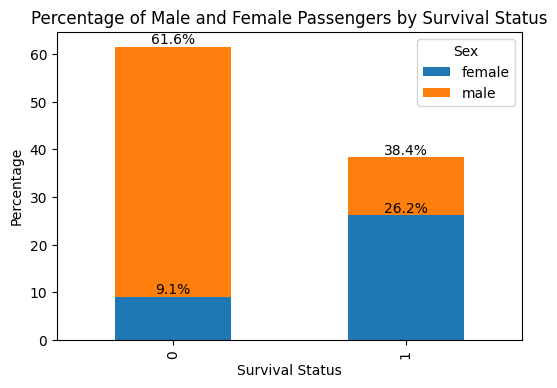

In [58]:
# let's calculate the percentage of survivors and non-survivors by gender
survived_gender_percentages = clean_db.groupby(['Survived', 'Sex']).size().unstack() / len(clean_db) * 100

# we plot the bar chart with stacked bars and add percentage labels
ax = survived_gender_percentages.plot(kind='bar', stacked=True, figsize=(6, 4))
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.1f%%')
ax.bar_label(ax.containers[1], label_type='edge', fmt='%.1f%%')

# set the labels and title
plt.xlabel('Survival Status')
plt.ylabel('Percentage')
plt.title('Percentage of Male and Female Passengers by Survival Status')

# and show the plot
plt.show()

WE CAN SEE VISUALISE THE PREVIOUS CONCLUSION IN %.

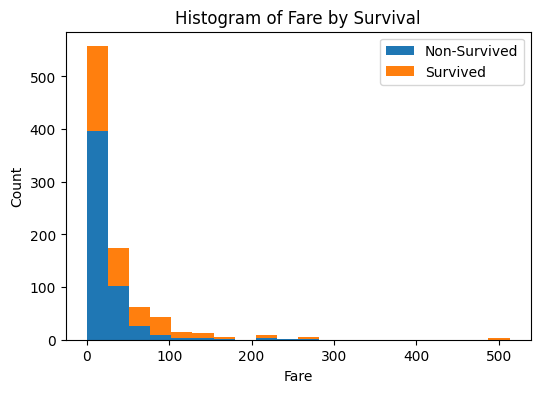

In [59]:
# let's select the 'Survived' and 'Fare' columns from our dataset,
survived = clean_db['Survived']
fare = clean_db['Fare']

# create a figure and axis object,
fig, ax = plt.subplots(figsize=(6, 4))

# plot the histogram,
ax.hist([fare[survived == 0], fare[survived == 1]], bins=20, stacked=True, label=['Non-Survived', 'Survived'])

# set the labels and title
ax.set_xlabel('Fare')
ax.set_ylabel('Count')
ax.set_title('Histogram of Fare by Survival')

# add a legend,
ax.legend()

# and show the plot!
plt.show()

WE CAN SEE FROM THIS HISTOGRAM, THAT **MOST DEAD PASSENGERS PAID THE LOWEST FARES TO BOARD THE TITANIC**. WE CAN ALSO SEE THAT SOMEONE PAID THE HIGHEST FARE AND SURVIVED.

In [60]:
# we are curious about who that was/were...
survivors = clean_db[clean_db['Survived'] == 1]

# find the passenger with the highest fare among the survivors
highest_fare_survivor = survivors[survivors['Fare'] == survivors['Fare'].max()]

# and print the information of the passenger with the highest fare and survived
print("Passenger(s) with the highest fare and survived:")
print(highest_fare_survivor)

Passenger(s) with the highest fare and survived:
        Survived  PassClass                                Name     Sex   Age  \
PassID                                                                          
259            1          1                    Ward, Miss. Anna  female  35.0   
680            1          1  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
738            1          1              Lesurer, Mr. Gustave J    male  35.0   

          Ticket   Fare        Cabin   Embarked Title  FamilyMembers  \
PassID                                                                 
259     PC 17755  513.0          NaN  Cherbourg  Miss              0   
680     PC 17755  513.0  B51 B53 B55  Cherbourg    Mr              1   
738     PC 17755  513.0         B101  Cherbourg    Mr              0   

        NoFamily FareCategory  
PassID                         
259         True         High  
680        False         High  
738         True         High  


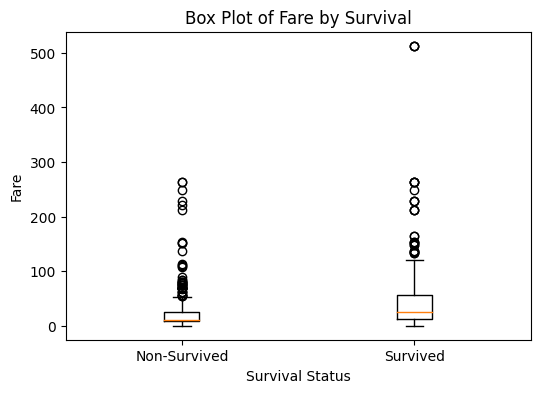

In [61]:
# moving on... Now we select the 'Survived' and 'Fare' columns from our dataset,
survived = clean_db['Survived']
fare = clean_db['Fare']

# create a figure and axis object,
fig, ax = plt.subplots(figsize=(6, 4))

# now create the box plot,
ax.boxplot([fare[survived == 0], fare[survived == 1]], labels=['Non-Survived', 'Survived'])

# set the labels and title,
ax.set_xlabel('Survival Status')
ax.set_ylabel('Fare')
ax.set_title('Box Plot of Fare by Survival')

# and show the plot!
plt.show()

WE CAN SEE FROM THIS BOX PLOT, THAT THE **MEDIAN PAID FARE BY SURVIVORS IS A LITTLE HIGHER THAN NON-SURVIVORS**. 

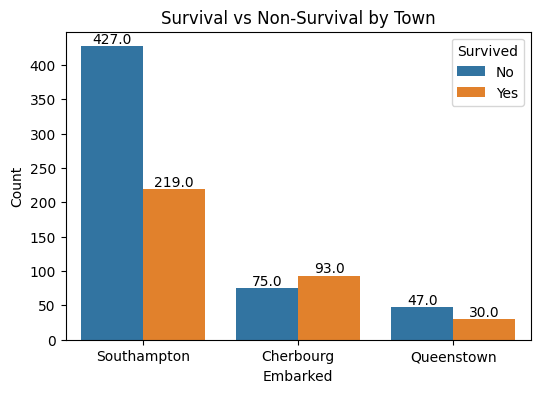

In [62]:
# let's visualise the Survive and Embarked variables a side-by-side bar plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=clean_db, x='Embarked', hue='Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival vs Non-Survival by Town')
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

# add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# and display!
plt.show()

WE CAN SEE FROM THIS BAR PLOT, THAT **MOST PEOPLE EMBARKED AT SOUTHAMPTON**, AND ALSO THAT **CHERBOURG** HAS PROPORTIONATELY THE **HIGHEST CHANCE OF SURVIVAL** OF ALL THREE PORTS.

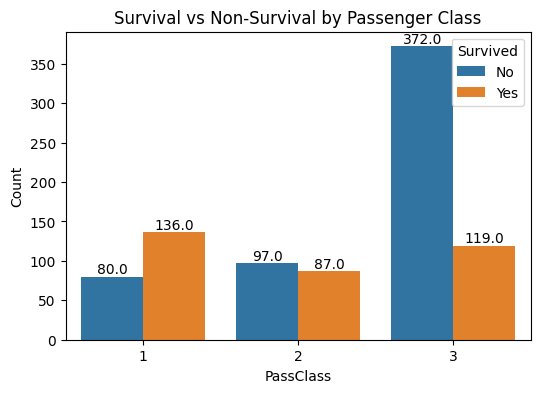

In [63]:
# now we do a side-by-side bar plot of Survived and Passenger Class
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=clean_db, x='PassClass', hue='Survived')
plt.xlabel('PassClass')
plt.ylabel('Count')
plt.title('Survival vs Non-Survival by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

# add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# and display!
plt.show()

SAFEST CLASS WAS CLASS 1. **MOST PEOPLE THAT DIED BOARDED INTO CLASS 3, AND ALSO PROPORTIONATELY.**

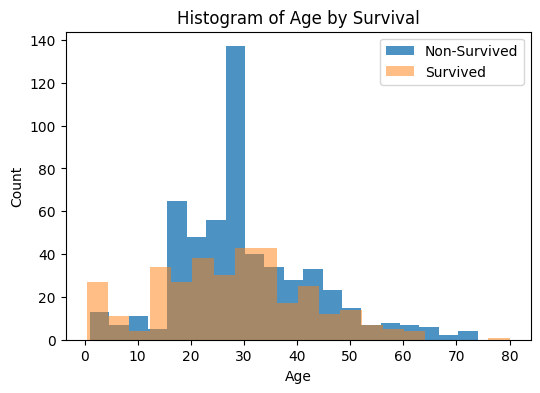

In [64]:
#'Age' is such an interesting variable, let's visualise it different ways!
plt.figure(figsize=(6, 4))
plt.hist(clean_db[clean_db['Survived'] == 0]['Age'], bins=20, alpha=0.8, label='Non-Survived')
plt.hist(clean_db[clean_db['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Survival')
plt.legend()
plt.show()

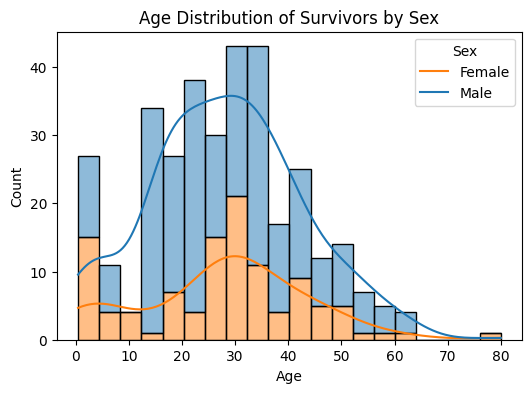

In [65]:
# we try now with filtering the dataset by survived and sex
survived_data = clean_db[clean_db['Survived'] == 1]
non_survived_data = clean_db[clean_db['Survived'] == 0]

# and we create a bar plot for age distribution of survivors
plt.figure(figsize=(6, 4))
sns.histplot(data=survived_data, x='Age', hue='Sex', kde=True, multiple='stack', bins=20)
plt.title('Age Distribution of Survivors by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

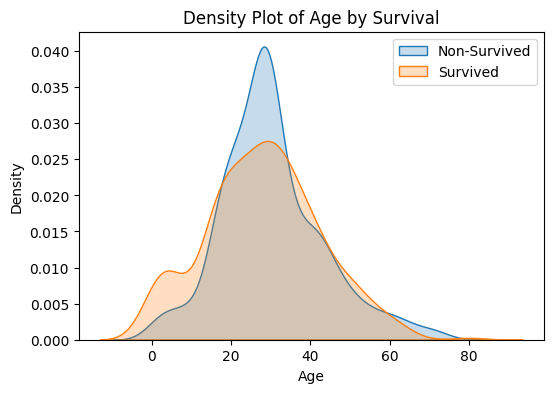

In [66]:
plt.figure(figsize=(6, 4))
sns.kdeplot(clean_db[clean_db['Survived'] == 0]['Age'], fill=True, label='Non-Survived')
sns.kdeplot(clean_db[clean_db['Survived'] == 1]['Age'], fill=True, label='Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age by Survival')
plt.legend()
plt.show()

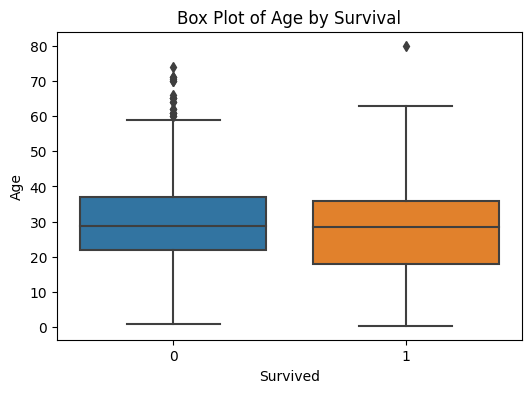

In [67]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=clean_db)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Box Plot of Age by Survival')
plt.show()

WE CAN SEE THAT PASSENGERS BETWEEN THE **AGES 60-63 AND 79 DID NOT SURVIVE**. WE WONDER IS THOSE PASSENGERS FAVOURED THE YOUNGER ONES...? WHAT AN ACT OF **COURAGE AND GENEROSITY.**
WE CAN ALSO SEE THAT MOST PEOPLE THAT DID **NOT SURVIVE, WERE 15-20 YEARS OLD AND 25 TO 30 YEARS OLD.**

In [68]:
# let's call the describe.() function for all basic statistics
clean_db.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0,0.000000,1.00,1.0
PassClass,891.0,2.308642,0.836071,1.00,2.0,3.000000,3.00,3.0
Age,891.0,29.425330,13.544261,0.42,21.0,28.724891,36.75,80.0
Fare,891.0,32.604938,49.699083,0.00,8.0,15.000000,31.00,513.0
FamilyMembers,891.0,0.904602,1.613459,0.00,0.0,0.000000,1.00,10.0


### At this stage into the Bivariate analysis, and also considering we will be building a logistic regression model, it is important to convert non-numerical variables into numerical variables when possible. This will also be beneficial for the upcoming correlation matrix! 

In [69]:
# let's recap on the variables in our dataset:
clean_db.head(2)
# we would like 'Embarked', 'FareCategory', 'NoFamily' and 'Sex' into numerical, so we begin!

,Survived,PassClass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily,FareCategory
PassID,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,8.0,NaN,Southampton,Mr,1,False,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,72.0,C85,Cherbourg,Mrs,1,False,High


In [70]:
# 'Sex': we use LabelEncoder, which will encode target labels with value between 0 and n_classes-1.
clean_db['Sex'] = LabelEncoder().fit_transform(clean_db['Sex'])
# we check that it worked, male = 1, female = 0

In [71]:
# 'NoFamily': we also use LabelEncoder, which will encode target labels with value between 0 and n_classes-1.
clean_db['NoFamily'] = LabelEncoder().fit_transform(clean_db['NoFamily'])
# we check that it worked, NoFamily = 0, with family = 1

In [72]:
# 'Fare': we also use LabelEncoder, which will encode target labels with value between 0 and n_classes-1.
clean_db['Embarked'] = LabelEncoder().fit_transform(clean_db['Embarked'])
# we check that it worked, NoFamily = 0, with family = 1

In [73]:
# 'Fare': we also use LabelEncoder, which will encode target labels with value between 0 and n_classes-1.
clean_db['FareCategory'] = LabelEncoder().fit_transform(clean_db['FareCategory'])
# we check that it worked, and that the variables's values are transformed into numerical data
clean_db.head(8)

,Survived,PassClass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily,FareCategory
PassID,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,8.0,NaN,2,Mr,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,72.0,C85,0,Mrs,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,8.0,NaN,2,Miss,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,54.0,C123,2,Mrs,1,0,0
5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,9.0,NaN,2,Mr,0,1,1
6,0,3,"Moran, Mr. James",1,28.724891,330877,9.0,NaN,1,Mr,0,1,1
7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,17463,52.0,E46,2,Mr,0,1,0
8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,349909,22.0,NaN,2,Master,4,0,2


/tmp/ipykernel_5879/3354077985.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_db.corr()


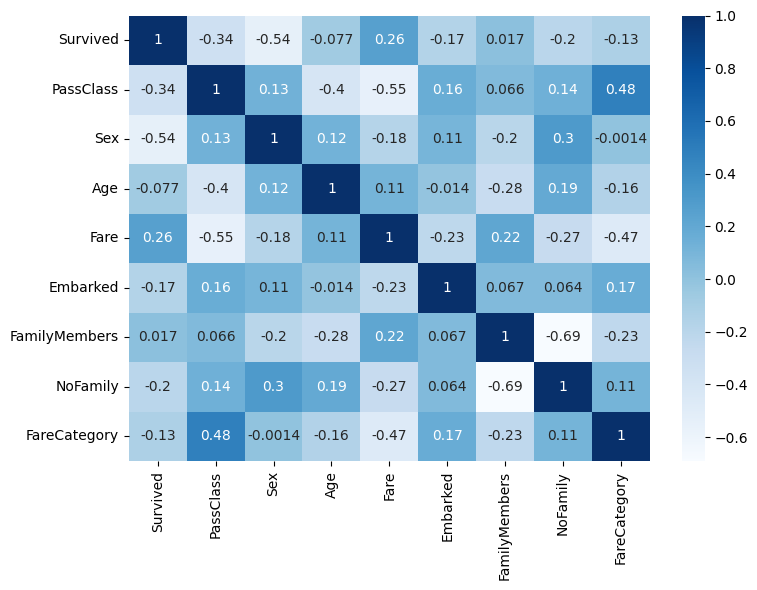

In [74]:
# let's try with a correlation matrix now!
# these lines of code will calculate the correlation matrix between the variables in our dataset. So interesting!
corr = clean_db.corr()
# plot the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="Blues")
# we adjust the subplot parameters to make the heatmap smaller
plt.tight_layout()
# and display the plot
plt.show()

The correlation coefficient ranges from -1 to +1, where -1 means a perfect negative correlation, +1 means a perfect positive correlation, and 0 means there is no correlation between the variables. I used here a sns.heatmap() to plot a correlation matrix of all of the variables in the Titanic dataset.

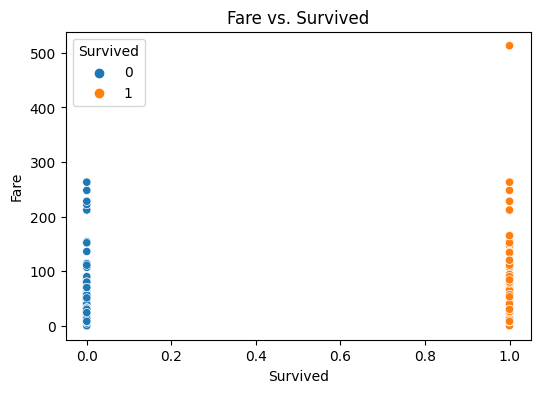

In [75]:
# this scatter plot of Fare vs. Survived will bring some further insights!
plt.figure(figsize=(6, 4))
sns.scatterplot(data=clean_db, x='Survived', y='Fare', hue='Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare vs. Survived')
plt.show()

WE CAN OBSERVE HOW **FARES ARE DIRECTLY RELATED TO SURVIVAL, AND HOW MOST PASSENGERS PAID THE LOWEST FARES RATHER THAN THE MOST EXPENSIVE ONES.**

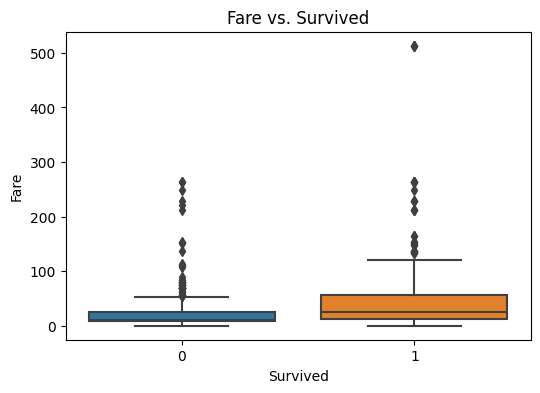

In [76]:
# with this box plot of Fare vs. Survived, we verify what we visualised earlier
plt.figure(figsize=(6, 4))
sns.boxplot(data=clean_db, x='Survived', y='Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare vs. Survived')
plt.show()

<AxesSubplot: xlabel='FamilyMembers', ylabel='Survived'>

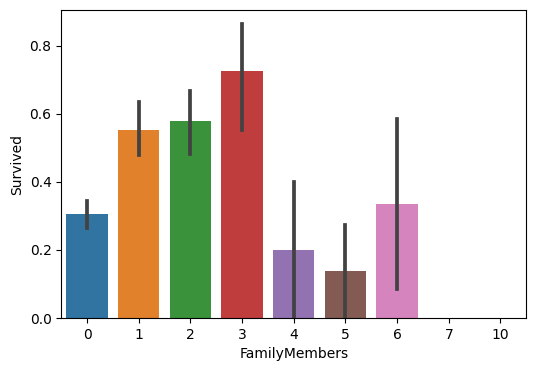

In [77]:
# lastly, we visualise Survived vs Family Members aboard
plt.figure(figsize=(6, 4))
sns.barplot(x='FamilyMembers', y='Survived', data=clean_db)

MOST SURVIVORS WERE WOMEN, AND IT APPEARS, **THE MORE FAMILY MEMBERS ABOARD, THE LOWER THE SURVIVAL CHANCE.**

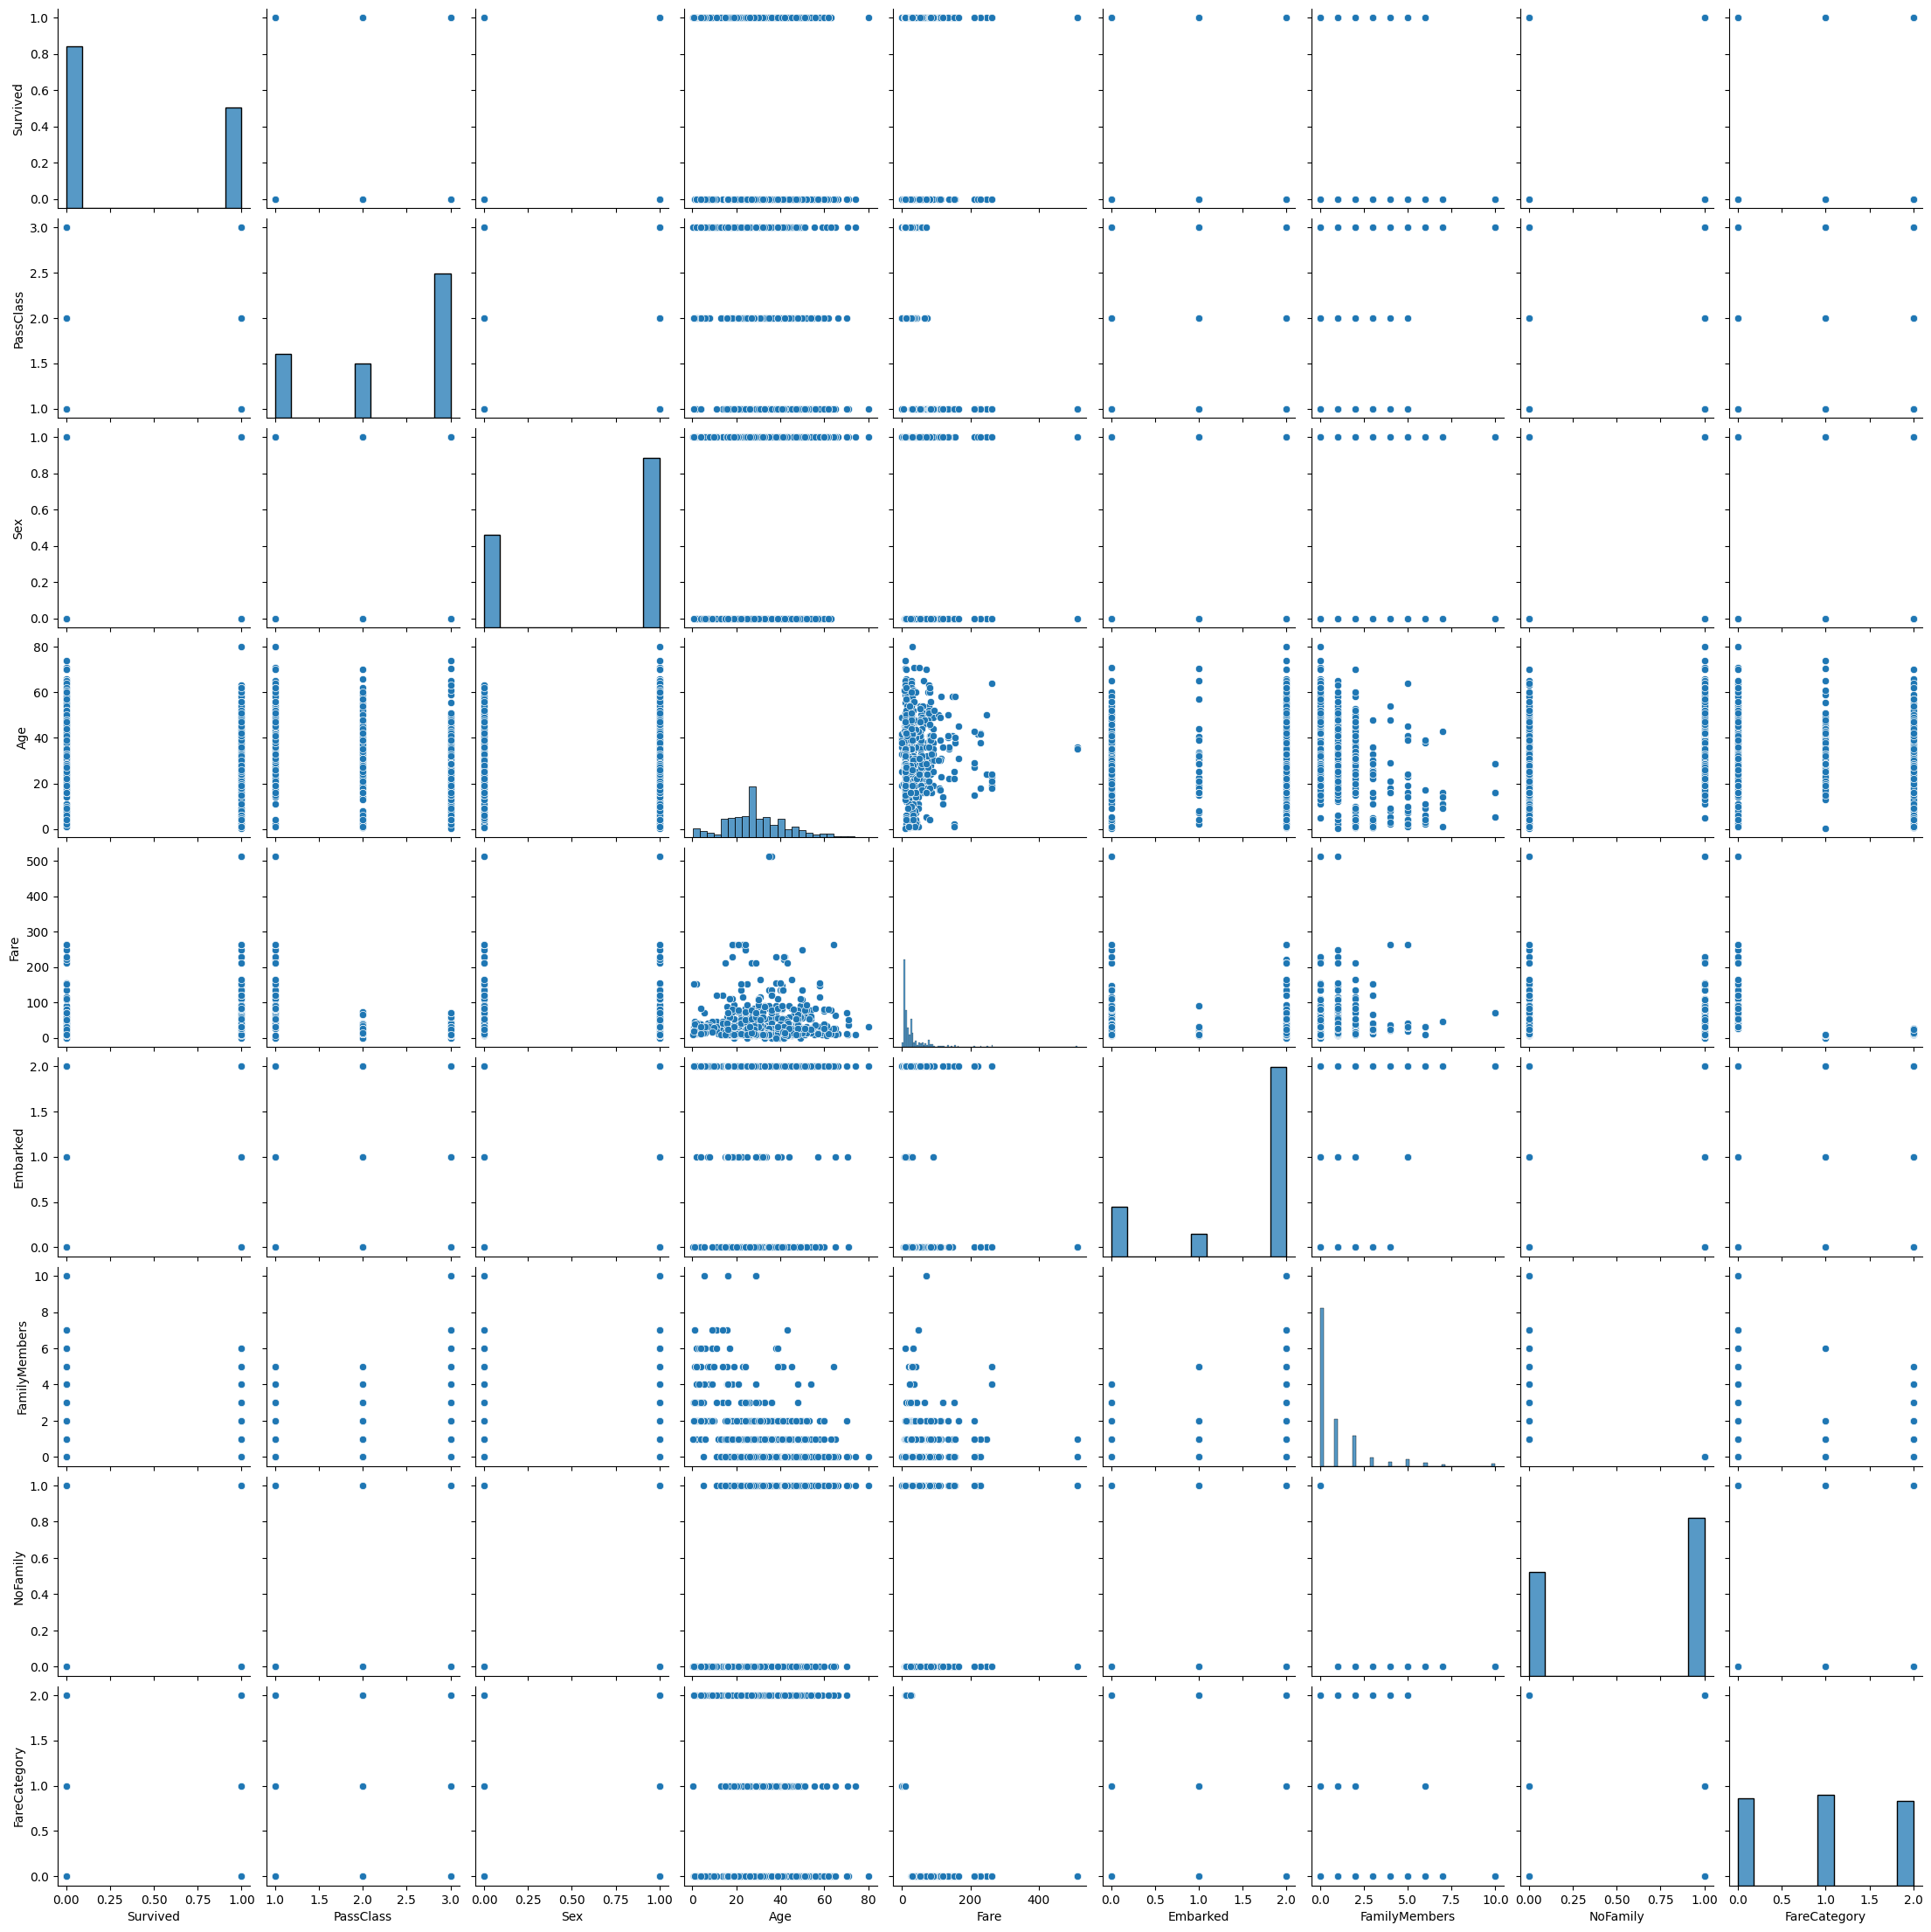

In [78]:
# and this is just so much fun to visualise! It works best with cleanest data as possible, and it's quite messy if there are many variables!
sns.pairplot(clean_db)

In [79]:
clean_db.head(2)

,Survived,PassClass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily,FareCategory
PassID,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,8.0,NaN,2,Mr,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,72.0,C85,0,Mrs,1,0,0


### 5. PREDICTION MODEL: LOGISTIC REGRESSION

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

Logistic regression uses ‘maximum likelihood’ to fit the best line to the data. So, what exactly is that?

Maximum Likelihood Estimation involves treating the problem as an optimization or search problem, where we seek a set of parameters that results in the best fit for the joint probability of the data sample (X).

I understand it better this way: imagine you have a box of different colored balls, and you want to know if a ball is red or blue based on its size. Logistic regression is a way to find a rule that helps you make this prediction.

That's logistic regression in simple terms: drawing a line that separates the data based on their features, using a sigmoid curve to transform the features into probabilities, and finding the best line that minimizes errors.

In [80]:
# we start by importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [81]:
# we continue by selecting the features (X) and the target variable (y)
X = clean_db[['PassClass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilyMembers', 'NoFamily', 'FareCategory']]
y = clean_db['Survived']

In [82]:
clean_db.head(1)

,Survived,PassClass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,NoFamily,FareCategory
PassID,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,8.0,NaN,2,Mr,1,0,1


In [96]:
# now we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# and we build and train the logistic regression model
# Create an instance of the model
model = LogisticRegression()

# and train the model using the training data
model.fit(X_train, y_train)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
# now we make predictions on the testing data
y_pred = model.predict(X_test)

# and calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Our logistic regression prediction's accuracy result is:", accuracy)


Our logistic regression prediction's accuracy result is: 0.8156424581005587


In this case, an accuracy score of 0.8044692737430168 indicates that our logistic regression model performed fairly well, **correctly predicting the survival status for around 80.45% of the passengers** in the testing dataset. 

However, it's important to note that **accuracy alone may not provide a complete picture of model performance**, especially if the dataset is imbalanced or there are other evaluation metrics to consider.

Logistic regression is just one type of classification algorithms. So, just for fun in this learning process, we will try other models such as decision tree, random forests, gradient boosting and support vector machines, and compare their performance against the logistic regression model. Each algorithm has its own strengths and weaknesses, and it's always worth exploring different models to see which one works best for our dataset!

In [99]:
from sklearn.tree import DecisionTreeClassifier

# we create the Decision Tree model
decision_tree = DecisionTreeClassifier()

# and fit the model to the training data
decision_tree.fit(X_train, y_train)

# now we make predictions on the test data
y_pred_dt = decision_tree.predict(X_test)

# now we make predictions on the testing data
y_pred_dt = model.predict(X_test)

# and calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_dt)
print("Our decision tree model's accuracy result is:", accuracy)

Our decision tree model's accuracy result is: 0.8156424581005587


In [100]:
from sklearn.ensemble import RandomForestClassifier

# we create the Random Forest model
random_forest = RandomForestClassifier()

# and fit the model to the training data
random_forest.fit(X_train, y_train)

# we make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

# and calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Our random forest model's accuracy result is:", accuracy)

Our random forest model's accuracy result is: 0.8379888268156425


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# we create the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# and fit the model to the training data
gradient_boosting.fit(X_train, y_train)

# we make predictions on the test data
y_pred_gb = gradient_boosting.predict(X_test)

# and calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_gb)
print("Our gradient boosting's accuracy result is:", accuracy)

Our gradient boosting's accuracy result is: 0.8268156424581006


In [102]:
from sklearn.svm import SVC

# we create the Support Vector Machines model
svm = SVC()

# and fit the model to the training data
svm.fit(X_train, y_train)

# we make predictions on the test data
y_pred_svm = svm.predict(X_test)

# and calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Our support vector machine model's accuracy result is:", accuracy)

Our support vector machine model's accuracy result is: 0.664804469273743


### The accuracy score indicates the proportion of correctly predicted outcomes (survival or non-survival) by the model. Higher accuracy scores indicate better performance in predicting the survival outcomes. In this case, the RANDOM FOREST model had the highest accuracy, followed closely by the GRADIENT BOOSTING model. 

### The logistic regression model had a slightly lower accuracy, and the SUPPORT VECTOR MACHINE model had the lowest accuracy among the models evaluated today.

### References:

grupo atrium

towardsdatascience

kaggle

github

medium